In [45]:
import json
import pandas
import requests
import matplotlib.pyplot as plt
import numpy as np
from pprint import pprint
import seaborn as sns
consumerkey = 'dEQv6fpw94TE1bLrk5RGk8tmqSuqewD8'
consumersecret = 'etlbiAvKzoszuYpK'
%matplotlib inline

In [3]:
#musictowns ={'New Orleans':'LA', 'Chicago':'IL', 'Memphis':'TN', 'Nashville':'TN', 'New York City':'NY', 'Los Angeles': 'CA', 'Atlanta':'GA', 'Seattle':'WA', 'Minneapolis': 'MN', 'Austin':'TX'}
#sportstowns = {'New York City':'NY', 'Los Angeles':'CA', 'San Francisco':'CA', 'Chicago':'IL', 'Dallas':'TX', 'Philidelphia':'PN', 'Denver':'CO', 'Miami':'FL', 'Boston':'MA', 'Cleveland':'OH' }
#midwestern = {'Columbus':'OH', 'Indianapolis':'ID', 'Milwaukee':'WI', 'Detroit':'MI', 'Louisville':'KY', 'Kansas City':'MO', 'Omaha':'NE', 'St louis':'MO', 'Minneapolis':'MN', 'Witchita':'KS'}
citylist = {'New Orleans': 'LA', 'Seattle': 'WA', 'Las Vegas': 'NV', 'Memphis':'TN', 'Miami':'FL', 'Milwaukee':'WI', 'Kansas City':'MO', 'St Louis':'MO', 'Denver': 'CO', 'Boston': 'MA'}
csvlist = []
for city, state in citylist.items():
    event_zips = []
    event_names = []
    event_types = []
    event_genres = []
    event_venues = []
    event_dates = []
    event_cities = []
    event_states = []
    event_lat = []
    event_lng = []
    
    for x in range(6):
        params ={'city': city, 'stateCode': state, 'size': 200, 'page': x}
        url = 'https://app.ticketmaster.com/discovery/v2/events.json?countryCode=US&apikey=dEQv6fpw94TE1bLrk5RGk8tmqSuqewD8'
        response = requests.get(url, params=params).json()
        try:
            for i in range(len(response['_embedded']['events'])):
                event_names.append(response['_embedded']['events'][i]['name'])
                event_types.append(response['_embedded']['events'][i]['classifications'][0]['segment']['name'])
                event_venues.append(response['_embedded']['events'][i]['_embedded']['venues'][0]['name'])
                event_dates.append(response['_embedded']['events'][i]["dates"]["start"]["localDate"])
                event_zips.append(response['_embedded']['events'][i]["_embedded"]["venues"][0]["postalCode"])
                event_cities.append(response['_embedded']['events'][i]["_embedded"]["venues"][0]["city"]["name"])
                event_states.append(response['_embedded']['events'][i]["_embedded"]["venues"][0]["state"]["name"])
                #event_lat.append(response['_embedded']['events'][i]["_embedded"]["venues"][0]["location"]["longitude"])
                #event_lng.append(response['_embedded']['events'][i]["_embedded"]["venues"][0]["location"]["latitude"])
                try:
                    event_genres.append(response['_embedded']['events'][i]['classifications'][0]['genre']['name'])
                except:
                    event_genres.append('Undefined')
        except KeyError:
            continue
            
    df = pandas.DataFrame({'event name': event_names, 
                       'Classification': event_types, 
                       'genre': event_genres, 
                       'venue': event_venues, 
                       'Date':event_dates, 
                       'Zip code':event_zips,         
                       'City':event_cities,
                       'State':event_states})
    df.to_csv(f'Visualizations/{city},{state}.csv')
    csvlist.append(f'{city},{state}.csv')

In [335]:
for city in csvlist:
    print(city[:-4])
city_csv = input('what city do you want to look at? -paste response- ') + '.csv'
df = pandas.read_csv('Visualizations/'+city_csv)
df.head()


New Orleans,LA
Seattle,WA
Las Vegas,NV
Memphis,TN
Miami,FL
Milwaukee,WI
Kansas City,MO
St Louis,MO
Denver,CO
Boston,MA
what city do you want to look at? -paste response- Boston,MA


,Unnamed: 0,event name,Classification,genre,venue,Date,Zip code,City,State
0,0,Marc Anthony,Music,World,Agganis Arena,2018-10-25,2215,Boston,Massachusetts
1,1,NICK CANNON PRESENTS: WILD 'N OUT LIVE,Arts & Theatre,Comedy,TD Garden,2018-08-24,2114,Boston,Massachusetts
2,2,Bad Bunny,Music,Hip-Hop/Rap,Agganis Arena,2018-08-17,2215,Boston,Massachusetts
3,3,Bruno Mars: 24K Magic World Tour,Music,Rock,TD Garden,2018-09-28,2114,Boston,Massachusetts
4,4,Kevin Hart: The Irresponsible Tour,Arts & Theatre,Comedy,TD Garden,2018-09-21,2114,Boston,Massachusetts


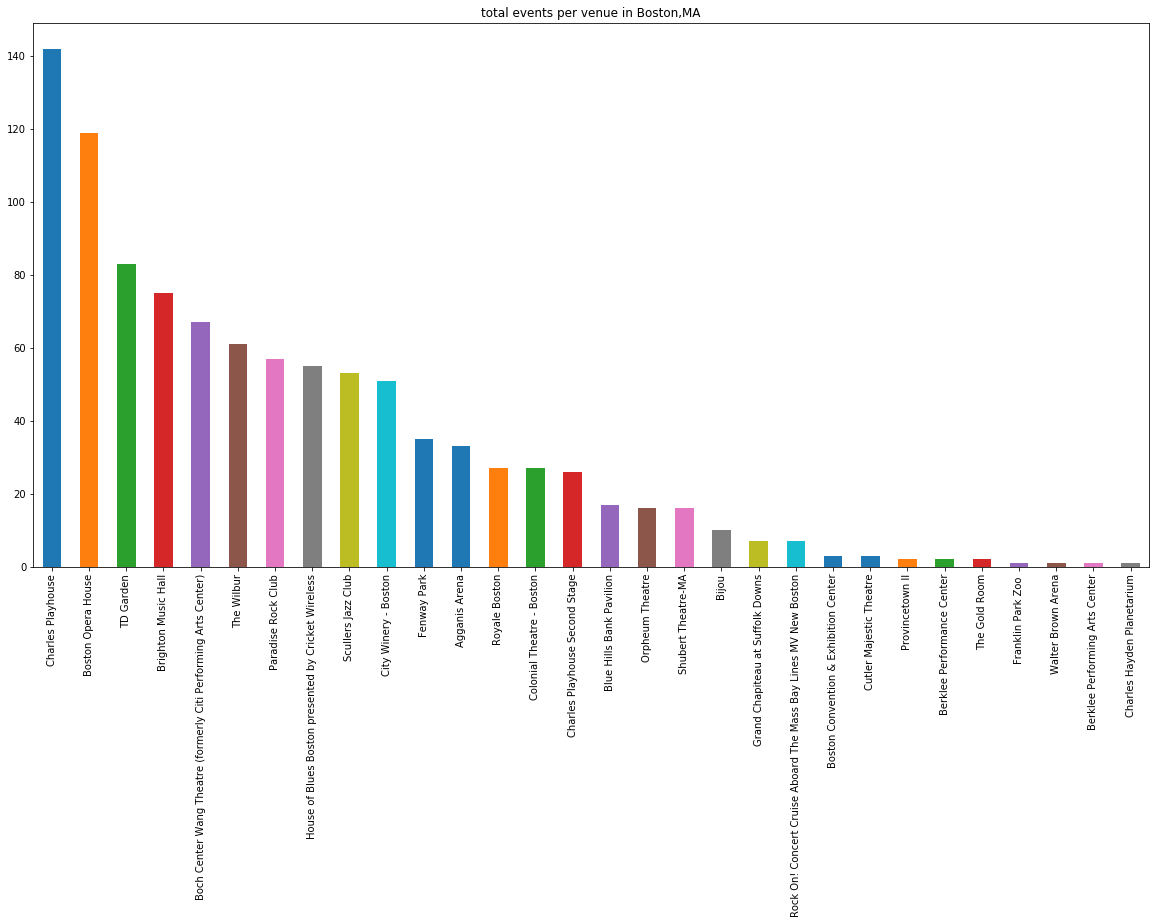

In [336]:
city_name = city_csv[:-4]
df = df.drop('Unnamed: 0', axis=1)
df['venue'].value_counts().plot(kind='bar', title=f'total events per venue in {city_name}', figsize=(20,10))
plt.savefig(f'Visualizations/graphs/{city_name} Bar1.png')

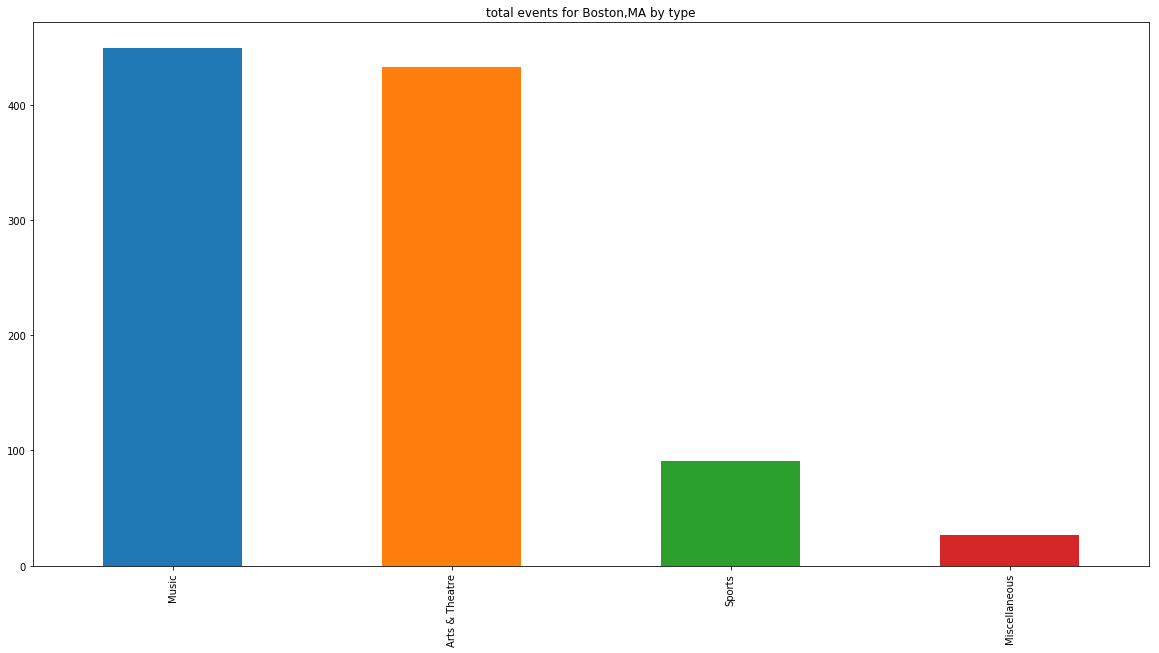

In [337]:
df['Classification'].value_counts().plot(kind='bar', title = f'total events for {city_name} by type', figsize= (20,10))
plt.savefig(f'Visualizations/graphs/{city_name} Bar2.png')

In [338]:
stacked = df.groupby(['venue','Classification']).count()
stacked.head()

event name  genre  Date  Zip code  \
venue                      Classification                                      
Agganis Arena              Miscellaneous           15     15    15        15   
                           Music                   11     11    11        11   
                           Sports                   7      7     7         7   
Berklee Performance Center Arts & Theatre           1      1     1         1   
                           Music                    1      1     1         1   

                                           City  State  
venue                      Classification               
Agganis Arena              Miscellaneous     15     15  
                           Music             11     11  
                           Sports             7      7  
Berklee Performance Center Arts & Theatre     1      1  
                           Music              1      1

In [339]:
venueDB  = {}
for index, row in stacked.iterrows():
    name = index[0]
    category = index[1]
    count = row['genre']
    if(venueDB.get(name, "null") == "null"):
        venueDB[name] = { category: count}
    else:
         venueDB[name][category] = count
db = pandas.DataFrame(venueDB)
stackedbar_df = db.transpose()
stackedbar_df = stackedbar_df.fillna(value= 0)

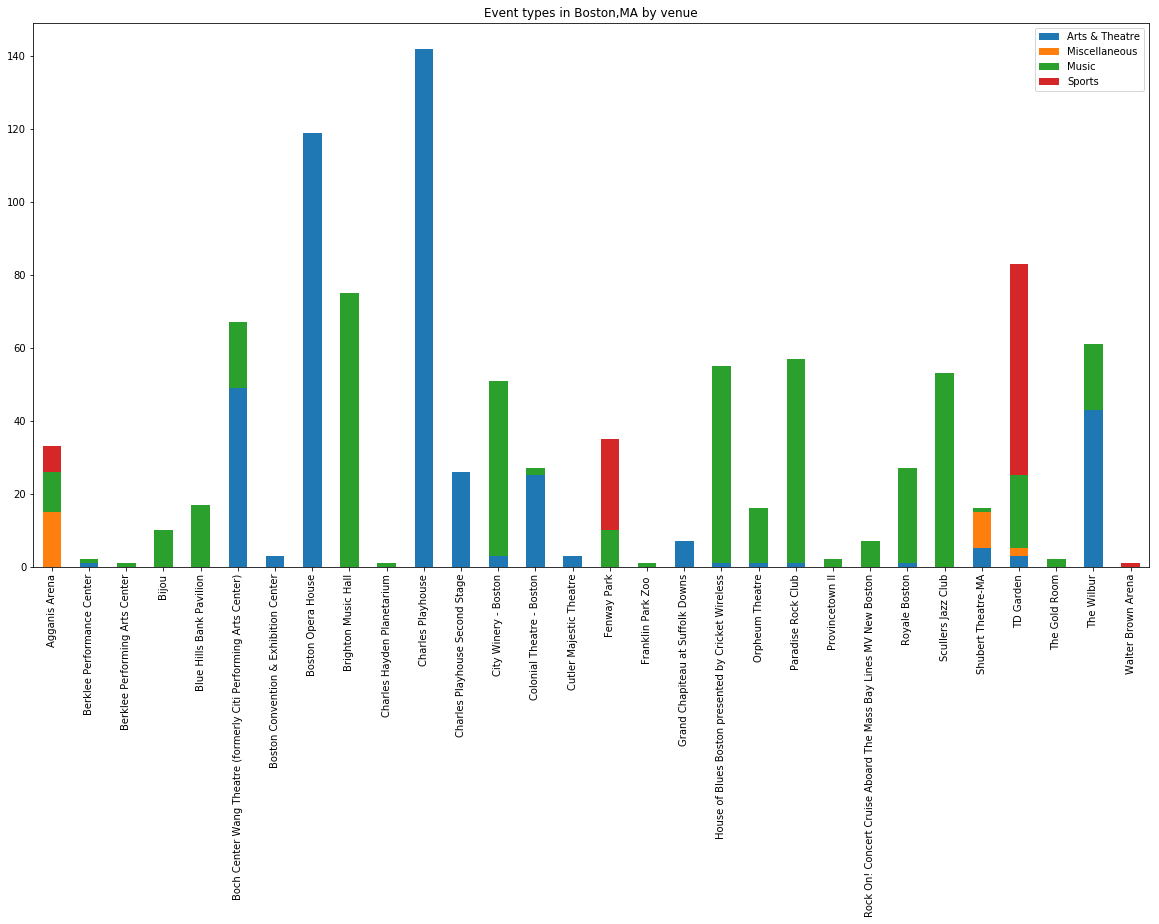

In [340]:
stackedevents = stackedbar_df.plot(kind='bar', stacked=True, figsize=(20,10), title=f'Event types in {city_name} by venue')
plt.savefig(f'Visualizations/graphs/{city_name} stackedBar.png')

In [341]:
stackedgenre = df.groupby(['Classification','genre']).count()
genreDB = {}
for index, row in stackedgenre.iterrows():
    Class = index[0]
    genre = index[1]
    count = row['event name']
    if (genreDB.get(Class, 'null') == 'null'):
        genreDB[Class] = {genre : count}
    else:
        genreDB[Class][genre] = count
genreDF = pandas.DataFrame(genreDB)
genreDF = genreDF.transpose()
genreDF = genreDF.fillna(value=0)

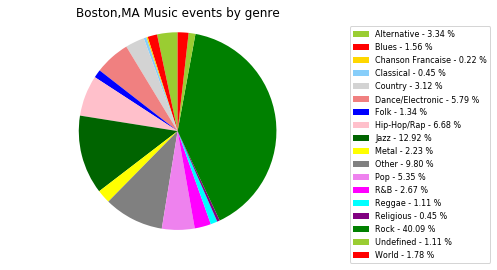

In [342]:
musicwedge = []
musiclabel = []
musicexplode = [0.0, 0.0, 0.0 , 0.0, 0.4, 0.3, 0.2, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

for key, value in genreDB['Music'].items():
    musicwedge.append(value)
    musiclabel.append(key)
x = np.char.array(musiclabel)
y = np.array(musicwedge)
colors = ['yellowgreen','red','gold','lightskyblue','lightgrey','lightcoral','blue','pink', 'darkgreen','yellow','grey','violet','magenta','cyan', 'purple', 'green']
porcent = 100.*y/y.sum()

patches, texts = plt.pie(y, colors=colors, startangle=90, radius=1.2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, porcent)]

sort_legend = False
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))

plt.legend(patches, labels, loc='upper left', bbox_to_anchor=(1, 1),
           fontsize=8)
plt.title(f'{city_name} Music events by genre')
plt.savefig(f'Visualizations/graphs/{city_name} Music pie.png' ,bbox_inches='tight')
plt.axis('equal')
plt.show()

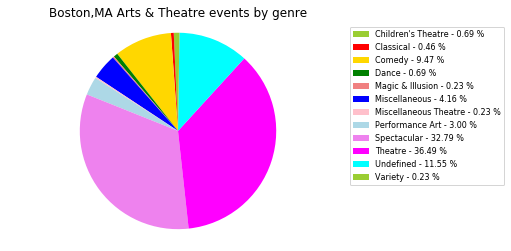

In [343]:
artwedge = []
artlabel = []
for key, value in genreDB['Arts & Theatre'].items():
    artwedge.append(value)
    artlabel.append(key)
x = np.char.array(artlabel)
y = np.array(artwedge)
colors = ['yellowgreen','red','gold','green','lightcoral','blue','pink','lightblue','violet','magenta','cyan']
porcent = 100.*y/y.sum()

patches, texts = plt.pie(y, colors=colors, startangle=90, radius=1.2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, porcent)]

sort_legend = False
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))
plt.title(f'{city_name} Arts & Theatre events by genre')
plt.legend(patches, labels, loc='upper left', bbox_to_anchor=(1, 1),
           fontsize=8)

plt.savefig(f'Visualizations/graphs/{city_name} Art & Theatre pie.png' ,bbox_inches='tight')
plt.axis('equal')
plt.show()

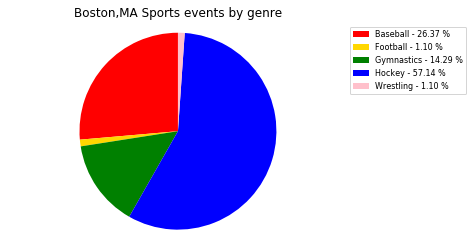

In [344]:
sportwedge = []
sportlabel = []
for key, value in genreDB['Sports'].items():
    sportwedge.append(value)
    sportlabel.append(key)
x = np.char.array(sportlabel)
y = np.array(sportwedge)
colors = ['red','gold','green','blue','pink','lightblue','violet','magenta','cyan']
porcent = 100.*y/y.sum()

patches, texts = plt.pie(y, colors=colors, startangle=90, radius=1.2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, porcent)]

sort_legend = False
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))
plt.title(f'{city_name} Sports events by genre')
plt.legend(patches, labels, loc='upper left', bbox_to_anchor=(1, 1),
           fontsize=8)

plt.savefig(f'Visualizations/graphs/{city_name} Sports pie.png' ,bbox_inches='tight')
plt.axis('equal')
plt.show()


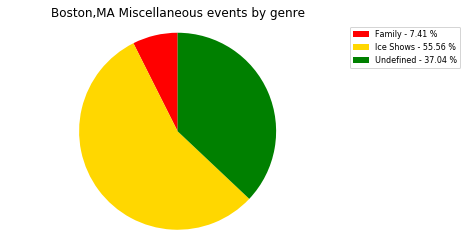

In [345]:
miscwedge = []
misclabel = []
for key, value in genreDB['Miscellaneous'].items():
    miscwedge.append(value)
    misclabel.append(key)
x = np.char.array(misclabel)
y = np.array(miscwedge)
colors = ['red','gold','green','blue','violet','magenta','cyan']
porcent = 100.*y/y.sum()

patches, texts = plt.pie(y, colors=colors, startangle=90, radius=1.2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, porcent)]

sort_legend = False
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))

plt.legend(patches, labels, loc='upper left', bbox_to_anchor=(1, 1),
           fontsize=8)
plt.title(f'{city_name} Miscellaneous events by genre')
plt.savefig(f'Visualizations/graphs/{city_name} Miscellaneous pie.png', bbox_inches='tight')
plt.axis('equal')
plt.show()


In [346]:
appended_data = []
for csv in csvlist:
    data = pandas.read_csv('Visualizations/' +csv)
    # store DataFrame in list
    appended_data.append(data)

appended_data = pandas.concat(appended_data, axis=0)

In [347]:
appended_data = appended_data.drop('Unnamed: 0', axis=1)

In [348]:
appended_data

,event name,Classification,genre,venue,Date,Zip code,City,State
0,P!NK: BEAUTIFUL TRAUMA WORLD TOUR,Music,Rock,Smoothie King Center,2019-03-17,70113,New Orleans,Louisiana
1,JAY-Z and BEYONCÉ - OTR II,Music,Hip-Hop/Rap,Mercedes-Benz Superdome,2018-09-13,70112,New Orleans,Louisiana
2,Kevin Hart: The Irresponsible Tour,Arts & Theatre,Comedy,Smoothie King Center,2018-10-18,70113,New Orleans,Louisiana
3,An Evening With Fleetwood Mac,Music,Rock,Smoothie King Center,2019-02-16,70113,New Orleans,Louisiana
4,Justin Timberlake - The Man Of The Woods Tour,Music,Rock,Smoothie King Center,2019-01-15,70113,New Orleans,Louisiana
5,Elton John: Farewell Yellow Brick Road,Music,Rock,Smoothie King Center,2018-12-06,70113,New Orleans,Louisiana
6,Live Nation Presents Journey / Def Leppard,Music,Rock,Smoothie King Center,2018-08-27,70113,New Orleans,Louisiana
7,Taylor Swift reputation Stadium Tour,Music,Rock,Mercedes-Benz Superdome,2018-09-22,70112,New Orleans,Louisiana
8,Lauren Daigle Look Up Child Tour,Music,Religious,Saenger Theatre New Orleans,2018-10-26,70112,New Orleans,Louisiana
9,Aubrey & The Three Migos Tour,Music,Hip-Hop/Rap,Smoothie King Center,2018-09-24,70113,New Orleans,Louisiana


In [349]:
ratiodf = pandas.DataFrame()
ratiodf['eventcount'] = appended_data['City'].value_counts()
ratiodf = ratiodf.head(10)


In [350]:
ratiodf['popcount'] = [3733580, 4628910, 2248390, 2814330, 2159159, 1262888, 1572245, 5564635, 1341746, 2807338]

In [351]:
ratiodf['result'] = ratiodf['eventcount'].div(ratiodf['popcount'], axis=0) 

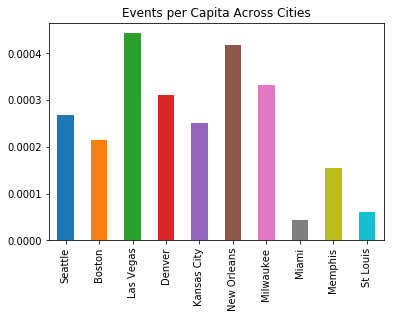

In [366]:
ratiodf['result'].plot(kind='bar', title= 'Events per Capita Across Cities')
plt.savefig(f'Visualizations/graphs/CityBar1.png')

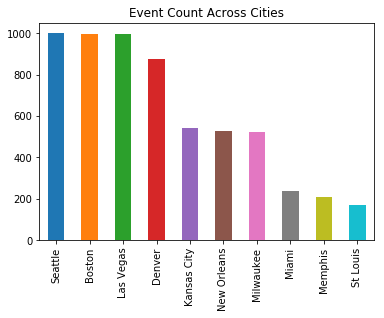

In [367]:
ratiodf['eventcount'].plot(kind='bar', title='Event Count Across Cities')
plt.savefig(f'Visualizations/graphs/CityBar2.png')

In [354]:
ratiodf

,eventcount,popcount,result
Seattle,1000,3733580,0.000268
Boston,998,4628910,0.000216
Las Vegas,996,2248390,0.000443
Denver,877,2814330,0.000312
Kansas City,544,2159159,0.000252
New Orleans,528,1262888,0.000418
Milwaukee,522,1572245,0.000332
Miami,239,5564635,0.000043
Memphis,207,1341746,0.000154
St Louis,172,2807338,0.000061


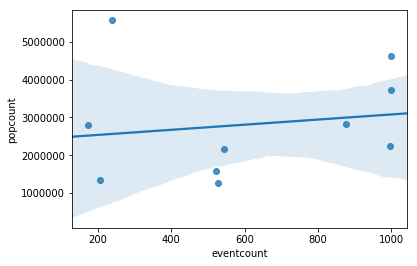

In [355]:
sns.regplot('eventcount', 'popcount', data=ratiodf)

In [356]:
dataframetest = ratiodf[ratiodf.popcount < 5000000]

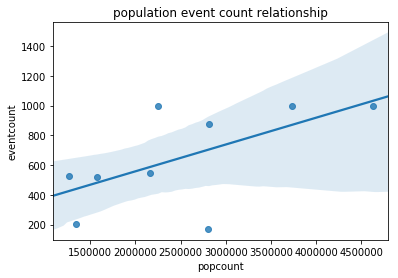

In [374]:
ax =sns.regplot('popcount', 'eventcount', data=dataframetest)
ax.set_title('population event count relationship')
plt.savefig(f'Visualizations/graphs/regression.png')

In [358]:
dataframetest.describe()

,eventcount,popcount,result
count,9.000000,9.000000e+00,9.000000
mean,649.333333,2.507621e+06,0.000273
std,332.054589,1.126883e+06,0.000121
min,172.000000,1.262888e+06,0.000061
25%,522.000000,1.572245e+06,0.000216
50%,544.000000,2.248390e+06,0.000268
75%,996.000000,2.814330e+06,0.000332
max,1000.000000,4.628910e+06,0.000443
